Importing:

In [32]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [33]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [34]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [35]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = '../DL_notebooks/configs/model_configs.json'
new_model_name = 'ResNet'
update_current_model(json_file_path, new_model_name)

In [36]:

model_config_file = open('../DL_notebooks/configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet':
        model = MRI_ResNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

Training and Testing Scratch ResNet:

In [37]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:09<03:04,  9.71s/epoch]

Epoch [1/20] Train Loss: 0.9922 Train Accuracy: 60.53% Validation Loss: 2.5515 Validation Accuracy: 35.22%


Training:  10%|█         | 2/20 [00:18<02:46,  9.25s/epoch]

Epoch [2/20] Train Loss: 0.5877 Train Accuracy: 78.30% Validation Loss: 1.1941 Validation Accuracy: 61.07%


Training:  15%|█▌        | 3/20 [00:28<02:40,  9.42s/epoch]

Epoch [3/20] Train Loss: 0.3029 Train Accuracy: 90.52% Validation Loss: 1.0188 Validation Accuracy: 70.60%


Training:  20%|██        | 4/20 [00:38<02:33,  9.58s/epoch]

Epoch [4/20] Train Loss: 0.1549 Train Accuracy: 95.64% Validation Loss: 0.6916 Validation Accuracy: 78.68%


Training:  25%|██▌       | 5/20 [00:47<02:22,  9.53s/epoch]

Epoch [5/20] Train Loss: 0.1165 Train Accuracy: 96.77% Validation Loss: 1.4789 Validation Accuracy: 64.62%


Training:  30%|███       | 6/20 [00:56<02:10,  9.30s/epoch]

Epoch [6/20] Train Loss: 0.0784 Train Accuracy: 98.12% Validation Loss: 0.6481 Validation Accuracy: 79.64%


Training:  35%|███▌      | 7/20 [01:04<01:56,  8.99s/epoch]

Epoch [7/20] Train Loss: 0.0450 Train Accuracy: 99.03% Validation Loss: 0.5216 Validation Accuracy: 84.01%


Training:  40%|████      | 8/20 [01:13<01:45,  8.77s/epoch]

Epoch [8/20] Train Loss: 0.0419 Train Accuracy: 99.78% Validation Loss: 0.5460 Validation Accuracy: 84.81%


Training:  45%|████▌     | 9/20 [01:21<01:34,  8.62s/epoch]

Epoch [9/20] Train Loss: 0.0758 Train Accuracy: 98.92% Validation Loss: 0.7942 Validation Accuracy: 75.12%


Training:  50%|█████     | 10/20 [01:31<01:29,  8.99s/epoch]

Epoch [10/20] Train Loss: 0.0452 Train Accuracy: 99.46% Validation Loss: 0.5099 Validation Accuracy: 84.65%


Training:  55%|█████▌    | 11/20 [01:41<01:23,  9.30s/epoch]

Epoch [11/20] Train Loss: 0.0421 Train Accuracy: 99.08% Validation Loss: 0.6443 Validation Accuracy: 82.55%


Training:  60%|██████    | 12/20 [01:51<01:16,  9.62s/epoch]

Epoch [12/20] Train Loss: 0.0580 Train Accuracy: 98.38% Validation Loss: 1.9381 Validation Accuracy: 63.33%


Training:  65%|██████▌   | 13/20 [02:01<01:08,  9.76s/epoch]

Epoch [13/20] Train Loss: 0.0775 Train Accuracy: 99.03% Validation Loss: 0.6591 Validation Accuracy: 80.78%


Training:  70%|███████   | 14/20 [02:11<00:58,  9.74s/epoch]

Epoch [14/20] Train Loss: 0.0909 Train Accuracy: 97.63% Validation Loss: 0.9614 Validation Accuracy: 75.77%


Training:  75%|███████▌  | 15/20 [02:20<00:47,  9.46s/epoch]

Epoch [15/20] Train Loss: 0.0993 Train Accuracy: 97.36% Validation Loss: 0.9185 Validation Accuracy: 78.84%


Training:  80%|████████  | 16/20 [02:29<00:37,  9.37s/epoch]

Epoch [16/20] Train Loss: 0.0661 Train Accuracy: 98.98% Validation Loss: 0.6425 Validation Accuracy: 82.55%


Training:  85%|████████▌ | 17/20 [02:38<00:28,  9.42s/epoch]

Epoch [17/20] Train Loss: 0.0322 Train Accuracy: 99.62% Validation Loss: 0.5163 Validation Accuracy: 82.88%


Training:  90%|█████████ | 18/20 [02:47<00:18,  9.19s/epoch]

Epoch [18/20] Train Loss: 0.0406 Train Accuracy: 99.62% Validation Loss: 0.6064 Validation Accuracy: 84.65%


Training:  95%|█████████▌| 19/20 [02:55<00:08,  8.91s/epoch]

Epoch [19/20] Train Loss: 0.0321 Train Accuracy: 99.62% Validation Loss: 0.6998 Validation Accuracy: 82.71%


Training: 100%|██████████| 20/20 [03:03<00:00,  9.19s/epoch]

Epoch [20/20] Train Loss: 0.0491 Train Accuracy: 99.62% Validation Loss: 0.5356 Validation Accuracy: 84.65%


In [38]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:00<00:17,  1.10epoch/s]

Testing Epoch [1/20] Test Loss: 0.4997 Test Accuracy: 85.97% Time per Epoch: 0.91 seconds


Testing:  10%|█         | 2/20 [00:01<00:16,  1.08epoch/s]

Testing Epoch [2/20] Test Loss: 0.4946 Test Accuracy: 85.97% Time per Epoch: 0.93 seconds


Testing:  15%|█▌        | 3/20 [00:02<00:15,  1.08epoch/s]

Testing Epoch [3/20] Test Loss: 0.4802 Test Accuracy: 85.97% Time per Epoch: 0.92 seconds


Testing:  20%|██        | 4/20 [00:03<00:15,  1.05epoch/s]

Testing Epoch [4/20] Test Loss: 0.4841 Test Accuracy: 85.97% Time per Epoch: 1.00 seconds


Testing:  25%|██▌       | 5/20 [00:04<00:14,  1.03epoch/s]

Testing Epoch [5/20] Test Loss: 0.4965 Test Accuracy: 85.97% Time per Epoch: 1.00 seconds


Testing:  30%|███       | 6/20 [00:05<00:14,  1.02s/epoch]

Testing Epoch [6/20] Test Loss: 0.4820 Test Accuracy: 85.97% Time per Epoch: 1.12 seconds


Testing:  35%|███▌      | 7/20 [00:06<00:13,  1.01s/epoch]

Testing Epoch [7/20] Test Loss: 0.5205 Test Accuracy: 85.97% Time per Epoch: 0.97 seconds


Testing:  40%|████      | 8/20 [00:07<00:12,  1.00s/epoch]

Testing Epoch [8/20] Test Loss: 0.4894 Test Accuracy: 85.97% Time per Epoch: 0.99 seconds


Testing:  45%|████▌     | 9/20 [00:08<00:11,  1.01s/epoch]

Testing Epoch [9/20] Test Loss: 0.4908 Test Accuracy: 85.97% Time per Epoch: 1.04 seconds


Testing:  50%|█████     | 10/20 [00:10<00:10,  1.08s/epoch]

Testing Epoch [10/20] Test Loss: 0.4804 Test Accuracy: 85.97% Time per Epoch: 1.21 seconds


Testing:  55%|█████▌    | 11/20 [00:11<00:09,  1.07s/epoch]

Testing Epoch [11/20] Test Loss: 0.5248 Test Accuracy: 85.97% Time per Epoch: 1.05 seconds


Testing:  60%|██████    | 12/20 [00:12<00:08,  1.04s/epoch]

Testing Epoch [12/20] Test Loss: 0.4933 Test Accuracy: 85.97% Time per Epoch: 0.97 seconds


Testing:  65%|██████▌   | 13/20 [00:13<00:07,  1.02s/epoch]

Testing Epoch [13/20] Test Loss: 0.4960 Test Accuracy: 85.97% Time per Epoch: 0.97 seconds


Testing:  70%|███████   | 14/20 [00:14<00:06,  1.02s/epoch]

Testing Epoch [14/20] Test Loss: 0.4830 Test Accuracy: 85.97% Time per Epoch: 1.02 seconds


Testing:  75%|███████▌  | 15/20 [00:15<00:05,  1.04s/epoch]

Testing Epoch [15/20] Test Loss: 0.4983 Test Accuracy: 85.97% Time per Epoch: 1.09 seconds


Testing:  80%|████████  | 16/20 [00:16<00:04,  1.04s/epoch]

Testing Epoch [16/20] Test Loss: 0.4864 Test Accuracy: 85.97% Time per Epoch: 1.03 seconds


Testing:  85%|████████▌ | 17/20 [00:17<00:03,  1.04s/epoch]

Testing Epoch [17/20] Test Loss: 0.4857 Test Accuracy: 85.97% Time per Epoch: 1.03 seconds


Testing:  90%|█████████ | 18/20 [00:18<00:02,  1.03s/epoch]

Testing Epoch [18/20] Test Loss: 0.4856 Test Accuracy: 85.97% Time per Epoch: 1.01 seconds


Testing:  95%|█████████▌| 19/20 [00:19<00:01,  1.02s/epoch]

Testing Epoch [19/20] Test Loss: 0.4828 Test Accuracy: 85.97% Time per Epoch: 0.98 seconds


Testing: 100%|██████████| 20/20 [00:20<00:00,  1.01s/epoch]

Testing Epoch [20/20] Test Loss: 0.5266 Test Accuracy: 85.97% Time per Epoch: 1.00 seconds
Average Test Loss: 0.4940
Average Test Accuracy: 85.97%


Model Classification Model 1:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       546
           1       0.99      1.00      1.00       560
           2       1.00      1.00      1.00       254
           3       0.99      1.00      0.99       497

    accuracy                           1.00      1857
   macro avg       1.00      1.00      1.00      1857
weighted avg       1.00      1.00      1.00      1857

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       169
           1       0.81      0.71      0.76       175
           2       0.93      0.86      0.89        97
           3       0.88      0.95      0.91       178

    accuracy                           0.85       619
   macro avg       0.86      0.85      0.85       619
weighted avg       0.85      0.85      0.84       619

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       186
           1       0.

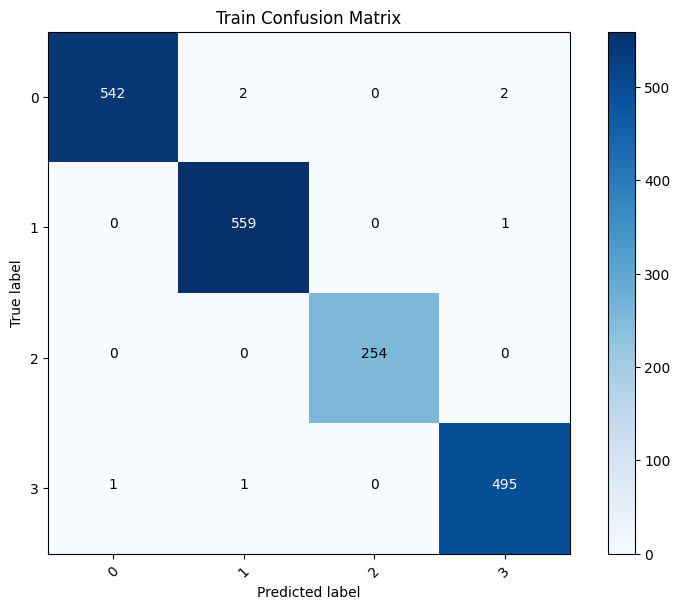

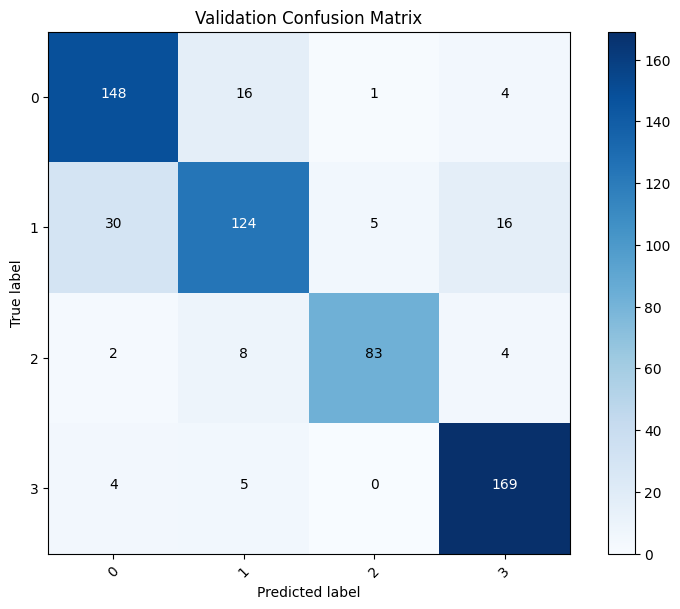

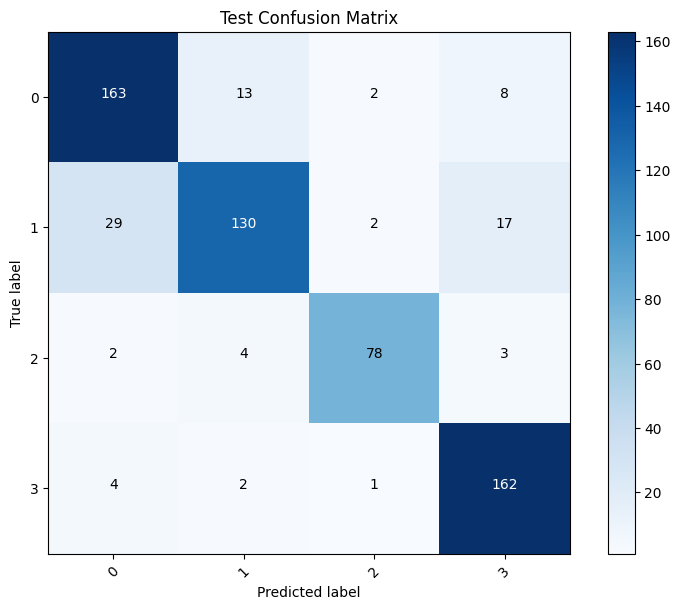

In [39]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

Training and Testing PreBuilt ResNet:

In [40]:
update_current_model(json_file_path, "ResNet2")
model_config_file = open('../DL_notebooks/configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet2':
        model = MRI_ResNet2
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [41]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels2, train_preds2 = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels2, val_preds2 = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   7%|▋         | 1/15 [04:21<1:00:59, 261.39s/epoch]

Epoch [1/15] Train Loss: 0.9759 Train Accuracy: 68.66% Validation Loss: 0.7022 Validation Accuracy: 81.91%


Training:  13%|█▎        | 2/15 [09:41<1:04:08, 296.01s/epoch]

Epoch [2/15] Train Loss: 0.4155 Train Accuracy: 88.69% Validation Loss: 0.2914 Validation Accuracy: 92.41%


Training:  20%|██        | 3/15 [15:42<1:05:07, 325.66s/epoch]

Epoch [3/15] Train Loss: 0.2066 Train Accuracy: 95.85% Validation Loss: 0.2311 Validation Accuracy: 92.57%


Training:  27%|██▋       | 4/15 [21:38<1:01:53, 337.59s/epoch]

Epoch [4/15] Train Loss: 0.1142 Train Accuracy: 98.87% Validation Loss: 0.2132 Validation Accuracy: 94.02%


Training:  33%|███▎      | 5/15 [28:54<1:02:09, 372.97s/epoch]

Epoch [5/15] Train Loss: 0.0700 Train Accuracy: 99.30% Validation Loss: 0.1783 Validation Accuracy: 94.18%


Training:  40%|████      | 6/15 [36:34<1:00:24, 402.70s/epoch]

Epoch [6/15] Train Loss: 0.0437 Train Accuracy: 100.00% Validation Loss: 0.1805 Validation Accuracy: 93.21%


Training:  47%|████▋     | 7/15 [44:30<56:53, 426.66s/epoch]  

Epoch [7/15] Train Loss: 0.0415 Train Accuracy: 99.84% Validation Loss: 0.2179 Validation Accuracy: 92.57%


Training:  53%|█████▎    | 8/15 [50:27<47:12, 404.58s/epoch]

Epoch [8/15] Train Loss: 0.0389 Train Accuracy: 99.95% Validation Loss: 0.1964 Validation Accuracy: 94.18%


Training:  60%|██████    | 9/15 [56:20<38:50, 388.39s/epoch]

Epoch [9/15] Train Loss: 0.0331 Train Accuracy: 99.95% Validation Loss: 0.1801 Validation Accuracy: 94.83%


Training:  67%|██████▋   | 10/15 [1:02:25<31:45, 381.18s/epoch]

Epoch [10/15] Train Loss: 0.0271 Train Accuracy: 99.95% Validation Loss: 0.1945 Validation Accuracy: 94.35%


Training:  73%|███████▎  | 11/15 [1:08:18<24:50, 372.51s/epoch]

Epoch [11/15] Train Loss: 0.0301 Train Accuracy: 99.95% Validation Loss: 0.1792 Validation Accuracy: 94.18%


Training:  80%|████████  | 12/15 [1:14:03<18:11, 363.99s/epoch]

Epoch [12/15] Train Loss: 0.0243 Train Accuracy: 100.00% Validation Loss: 0.1983 Validation Accuracy: 93.38%


Training:  80%|████████  | 12/15 [1:18:42<19:40, 393.56s/epoch]


KeyboardInterrupt: 

In [ ]:
test_losses2 = []
test_accuracies2 = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss2, test_accuracy2, test_label2, test_preds2 = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses2.append(test_loss2)
    test_accuracies2.append(test_accuracy2)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss2:.4f} "
        f"Test Accuracy: {test_accuracy2 * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses2) / len(test_losses2)
avg_test_accuracy = sum(test_accuracies2) / len(test_accuracies2)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:09<01:29,  9.93s/epoch]

Testing Epoch [1/10] Test Loss: 0.2520 Test Accuracy: 93.39% Time per Epoch: 9.93 seconds


Testing:  20%|██        | 2/10 [00:19<01:19,  9.89s/epoch]

Testing Epoch [2/10] Test Loss: 0.2372 Test Accuracy: 93.39% Time per Epoch: 9.85 seconds


Testing:  30%|███       | 3/10 [00:29<01:09,  9.88s/epoch]

Testing Epoch [3/10] Test Loss: 0.2353 Test Accuracy: 93.39% Time per Epoch: 9.87 seconds


Testing:  40%|████      | 4/10 [00:39<00:59,  9.89s/epoch]

Testing Epoch [4/10] Test Loss: 0.2344 Test Accuracy: 93.39% Time per Epoch: 9.90 seconds


Testing:  50%|█████     | 5/10 [00:49<00:49,  9.90s/epoch]

Testing Epoch [5/10] Test Loss: 0.2343 Test Accuracy: 93.39% Time per Epoch: 9.92 seconds


Testing:  60%|██████    | 6/10 [00:59<00:39,  9.90s/epoch]

Testing Epoch [6/10] Test Loss: 0.2443 Test Accuracy: 93.39% Time per Epoch: 9.89 seconds


Testing:  70%|███████   | 7/10 [01:09<00:29,  9.89s/epoch]

Testing Epoch [7/10] Test Loss: 0.2483 Test Accuracy: 93.39% Time per Epoch: 9.88 seconds


Testing:  80%|████████  | 8/10 [01:19<00:19,  9.89s/epoch]

Testing Epoch [8/10] Test Loss: 0.2359 Test Accuracy: 93.39% Time per Epoch: 9.89 seconds


Testing:  90%|█████████ | 9/10 [01:29<00:09,  9.90s/epoch]

Testing Epoch [9/10] Test Loss: 0.2487 Test Accuracy: 93.39% Time per Epoch: 9.91 seconds


Testing: 100%|██████████| 10/10 [01:39<00:00,  9.90s/epoch]

Testing Epoch [10/10] Test Loss: 0.2409 Test Accuracy: 93.39% Time per Epoch: 9.94 seconds
Average Test Loss: 0.2411
Average Test Accuracy: 93.39%


Model Classification for Model 2:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00       560
           2       1.00      1.00      1.00       254
           3       1.00      1.00      1.00       497

    accuracy                           1.00      1857
   macro avg       1.00      1.00      1.00      1857
weighted avg       1.00      1.00      1.00      1857

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       169
           1       0.94      0.87      0.91       175
           2       0.90      1.00      0.95        97
           3       0.95      0.98      0.96       178

    accuracy                           0.94       619
   macro avg       0.94      0.95      0.94       619
weighted avg       0.94      0.94      0.94       619

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       186
           1       0.

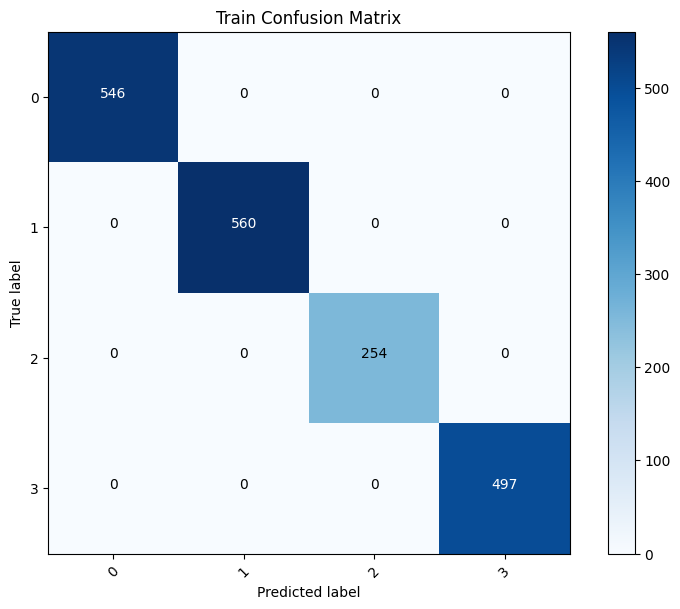

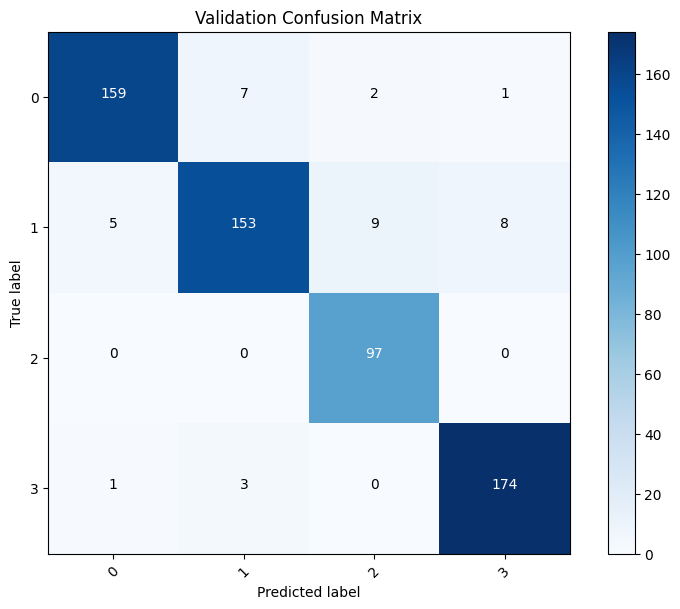

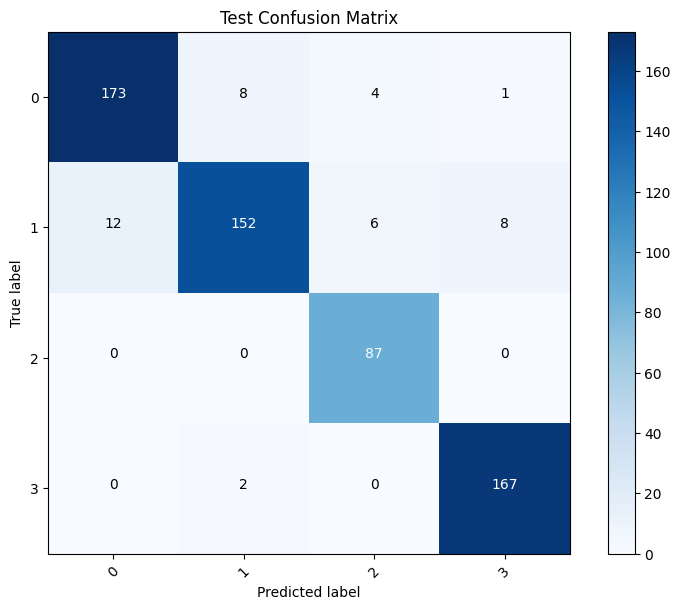

In [ ]:
confusion_train = confusion_matrix(train_labels2, train_preds2)
confusion_val = confusion_matrix(val_labels2, val_preds2)
confusion_test = confusion_matrix(test_label2, test_preds2)

print(classification_report(train_labels2, train_preds2))
print(classification_report(val_labels2, val_preds2))
print(classification_report(test_label2, test_preds2))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()